In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import timeit
from scipy.optimize import curve_fit
from scipy.stats import rv_continuous as MLE
from scipy.optimize import fsolve
from scipy.special import gammaincc 
from scipy import integrate
import math
from mpmath import meijerg as mg
from mpmath import *
#import xarray

In [2]:
#wf = pd.read_csv("../Data_Sets/weeplaces/weeplaces/weeplace_checkins_scrubbed_Reordered_DistinctLocs.csv")
wf = pd.read_csv("../Data_Sets/weeplaces/weeplaces/weeplace_checkins_scrubbed_Reordered_DistinctLocs_QPiRog2.csv")

In [3]:
wf = wf.drop(columns = ['Unnamed: 0','Year','Week','Delta_t','Delta_r','Counts'])
wf['datetime'] = pd.to_datetime(wf['datetime'])

In [210]:
wf[wf['userid'] == wf[wf['n'] == wf['n'].max()]['userid'].to_list()[0]]


,userid,placeid,datetime,lat,lon,city,category,Hours,cum_tot,Week Hour,...,S,Week2,S_id,n,rcm(final)_x,rcm(final)_y,Radius of Gyration,q,Pi_Max,True Entropy
5975911,sandro-pigoni,bahnhof-enge-zurich,2010-03-24 07:18:45,0.826663,0.148912,Zurich,Travel:Train Station:Train,0.000000,0.000000,55,...,1,0,,1,0.14014,0.824042,461.28568,0.872423,0.801323,2.582735
5975912,sandro-pigoni,assai-dialog-digital-ag-zurich,2010-03-24 07:36:02,0.826595,0.148635,Zürich,Home / Work / Other:Corporate / Office,0.288056,0.288056,55,...,2,0,,2,0.14014,0.824042,461.28568,0.872423,0.801323,2.582735
5975913,sandro-pigoni,assai-dialog-digital-ag-zurich,2010-03-24 09:52:43,0.826595,0.148635,Zürich,Home / Work / Other:Corporate / Office,2.278056,2.566111,57,...,2,0,,3,0.14014,0.824042,461.28568,0.872423,0.801323,2.582735
5975914,sandro-pigoni,weystrasse-26-luzern-luzern,2010-03-24 18:11:29,0.821306,0.145071,Luzern,Home / Work / Other:Home,8.312778,10.878889,66,...,3,0,,4,0.14014,0.824042,461.28568,0.872423,0.801323,2.582735
5975915,sandro-pigoni,s10,2010-03-25 07:03:52,0.826879,0.149036,NaN,NaN,12.873056,23.751944,79,...,4,0,,5,0.14014,0.824042,461.28568,0.872423,0.801323,2.582735
5975916,sandro-pigoni,assai-dialog-digital-ag-zurich,2010-03-25 07:21:03,0.826595,0.148635,Zürich,Home / Work / Other:Corporate / Office,0.286389,24.038333,79,...,2,0,,6,0.14014,0.824042,461.28568,0.872423,0.801323,2.582735
5975917,sandro-pigoni,kongresshaus-zurich,2010-03-25 18:03:28,0.826692,0.149003,Zurich,Arts & Entertainment:Other - Entertainment,10.706944,34.745278,90,...,5,0,,7,0.14014,0.824042,461.28568,0.872423,0.801323,2.582735
5975918,sandro-pigoni,zurich-hauptbahnhof-zurich,2010-03-25 22:36:21,0.826905,0.149056,Zurich,Travel:Train Station:Train,4.548056,39.293333,94,...,6,0,,8,0.14014,0.824042,461.28568,0.872423,0.801323,2.582735
5975919,sandro-pigoni,bahnhof-luzern-luzern,2010-03-25 23:32:51,0.821180,0.145040,Luzern,Travel:Train Station,0.941667,40.235000,95,...,7,0,,9,0.14014,0.824042,461.28568,0.872423,0.801323,2.582735
5975920,sandro-pigoni,weystrasse-26-luzern-luzern,2010-03-26 06:02:48,0.821306,0.145071,Luzern,Home / Work / Other:Home,6.499167,46.734167,102,...,3,0,,10,0.14014,0.824042,461.28568,0.872423,0.801323,2.582735


In [9]:
usrs = [wf.groupby('userid').count().index.to_list()]

In [284]:
#s = np.arange(1,wf[(wf['userid'] == usrs[0][0])]['S'].max(),1)
V = [[]]
start = timeit.default_timer()
#moststeps = wf[wf['n'] == wf['n'].max()]['userid'].to_list()[0]
for s in np.arange(1,wf[(wf['userid'] == usrs[0][15])]['S'].max(),1):
    loc = np.histogram(wf[(wf['userid'] == usrs[0][15]) & (wf['S'] == s)]['Week Hour'].to_list(),bins = np.arange(0,169))[0]
    V[s-1] = loc/np.sum(loc)
    V.append([])
#    print(s)
del V[-1]
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  534.2040752999892


In [36]:
levs = np.linspace(0,1,20)

([<matplotlib.axis.XTick at 0x25a7d9a2b00>,
 <a list of 14 Text xticklabel objects>)

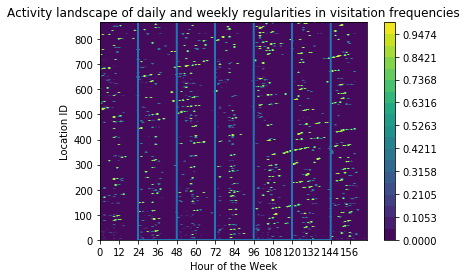

In [285]:
plt.xlabel('Hour of the Week')
plt.ylabel('Location ID')
plt.title('Activity landscape of daily and weekly regularities in visitation frequencies')
locs = np.arange(1,len(V)+1,1)
X = np.arange(0,168,1)
Y = locs.copy()
a = []
b = []
for i in range(6):
    a = a + [(i+1)*24]*(len(locs))
    b = b + list(np.arange(1,len(locs),1))
    b = b + [1]
plt.plot(a,b)
X1,Y1 = np.meshgrid(X,Y)
#Phi = np.histogram2d(deltaxy100[2],deltaxy100[3],bins = (X,Y))
X1.shape
#plt.pcolormesh(X1,Y1,Phi[0].T/Phi[0].sum())
plt.contourf(X1,Y1,V,levs)
plt.colorbar()
plt.xticks(np.arange(0,168,12))

In [106]:
def EucDist(a,b):
    return np.sum((a-b)**2)

def minDist(k,a):
    minn = EucDist(k[0],a)
    pos = 0
    i = 1
    for clus in k[1:]:
        if (EucDist(clus,a) < minn):
            minn = EucDist(clus,a)
            pos = i
        i+=1
    return pos

In [286]:
#cluster = [[]]
#defines beginning cluster
k = [[]]
start = timeit.default_timer()
for i in range(6):
    k[i] = V[i*int(len(V)/6)]
    k.append([])
del k[-1]   

clusterlocs = [[],[],[],[],[],[]]
i = 0
for v in V:
    clusterlocs[minDist(k,v)].append(i)
    i+=1
clusprev = clusterlocs.copy()

z = 0
while z < 15:
#    print(k[0])
    i = 0
    z+=1
    for clus in clusterlocs:
        k[i] = np.mean([V[j] for j in clus],axis = 0)
        i+=1
    i = 0
    clusterlocs = [[],[],[],[],[],[]]
    for v in V:
        clusterlocs[minDist(k,v)].append(i)
        i+=1
    if clusprev == clusterlocs:
        print(z)
        break
    else:
        clusprev = clusterlocs.copy()
Vclus = []
i = 0
for clus in clusterlocs:
    Vclus.append([V[j] for j in clus])
#    Vclus.append()
    i+=1
#print(Vclus)
stop = timeit.default_timer()
print('Time: ', stop - start)

4
Time:  0.317342100024689


In [203]:
len(Vclus[0][0])

168

In [277]:
len(V)

168

([<matplotlib.axis.XTick at 0x25a82386f60>,
 <a list of 14 Text xticklabel objects>)

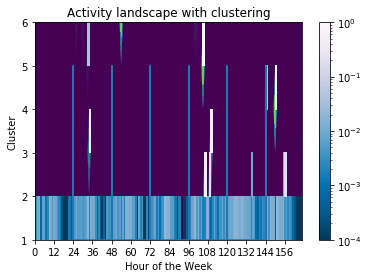

In [287]:
plt.xlabel('Hour of the Week')
plt.ylabel('Cluster')
plt.title('Activity landscape with clustering')
locs = np.arange(1,len(Vclus)+1,1)
levs2 = np.append(0,np.logspace(-5,0,20))
#levs2 = np.logspace(-5,0,20)
X = np.arange(0,168,1)
Y = locs.copy()
a = []
b = []
for i in range(6):
    a = a + [(i+1)*24]*(len(locs))
    b = b + list(np.arange(1,len(locs),1))
    b = b + [1]
plt.plot(a,b)
X1,Y1 = np.meshgrid(X,Y)
#plt.pcolormesh(X1,Y1,Phi[0].T/Phi[0].sum())
plt.contourf(X1,Y1,k,levs2)
pcm = plt.pcolor(X1, Y1, k, norm=colors.LogNorm(vmin=0.0001, vmax=1),cmap='PuBu_r')
plt.colorbar(pcm)
'''values = levs2'''
plt.xticks(np.arange(0,168,12))
#plt.ylim(0,6)

In [152]:
clusterlocs[1]

[]

In [91]:
a = np.array([2,4,8,4])
b = np.array([1,1,1,1])
np.sum((a-b)**2)

68

In [115]:
np.mean([V[i] for i in clusterlocs[2]],axis = 0)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.16666667,
       0.16666667, 0.16666667, 0.        , 0.        , 0.        ,
       0.        , 0.07142857, 0.07142857, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.14285714,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.07142857, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     